In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
df=pd.read_csv("ORIGINAL Police_Department_Incident_Reports__Historical_2003_to_May_2018 - Copy.csv", parse_dates=[['Date','Time']])

In [3]:
df.head()

,Date_Time,IncidntNum,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,...,Civic Center Harm Reduction Project Boundary,Fix It Zones as of 2017-11-06,DELETE - HSOC Zones,Fix It Zones as of 2018-02-07,"CBD, BID and GBD Boundaries as of 2017","Areas of Vulnerability, 2016",Central Market/Tenderloin Boundary,Central Market/Tenderloin Boundary Polygon - Updated,HSOC Zones as of 2018-06-05,OWED Public Spaces
0,2011-04-15 16:00:00,110308742,MISSING PERSON,FOUND PERSON,Friday,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1,2009-03-26 12:28:00,90316914,WARRANTS,WARRANT ARREST,Thursday,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,...,1.0,NaN,1.0,NaN,7.0,2.0,1.0,1.0,1.0,35.0
2,2013-02-15 02:00:00,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,...,NaN,1.0,5.0,1.0,9.0,1.0,NaN,NaN,5.0,NaN
3,2008-01-15 20:13:00,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,...,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN
4,2007-05-26 18:10:00,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,...,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN


In [4]:
df.dtypes

Date_Time                                               datetime64[ns]
IncidntNum                                                       int64
Category                                                        object
Descript                                                        object
DayOfWeek                                                       object
PdDistrict                                                      object
Resolution                                                      object
Address                                                         object
X                                                              float64
Y                                                              float64
Location                                                        object
PdId                                                             int64
SF Find Neighborhoods                                          float64
Current Police Districts                                       float64
Curren

In [5]:
pd.options.display.max_columns=100
def feature_engineering(data):
    data['Date'] = pd.to_datetime(data['Date_Time'].dt.date)
    data['n_days'] = (data['Date_Time'] - data['Date_Time'].min()).apply(lambda x: x.days)
    data['Day'] = data['Date_Time'].dt.day
    data['DayOfWeek'] = data['Date_Time'].dt.weekday
    data['Month'] = data['Date_Time'].dt.month
    data['Season']=data['Date_Time'].dt.month
    data['Year'] = data['Date_Time'].dt.year
    data['Hour'] = data['Date_Time'].dt.hour
    data['Minute'] = data['Date_Time'].dt.minute
    data['TP']=data['Date_Time'].dt.hour
    data['dayofyear']=data['Date_Time'].dt.dayofyear
    
    data.drop(columns=['Address'], inplace=True)
    return data
df = feature_engineering(df)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
print(np.min(df['Date'] ),np.max(df['Date'] ))
df = df.sort_values('Date', ascending=True) 
df = df.dropna(how='any')

df.head()

2003-01-01 00:00:00 2018-05-15 00:00:00


,Date_Time,IncidntNum,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y,Location,PdId,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,DELETE - Fire Prevention Districts,DELETE - Police Districts,DELETE - Supervisor Districts,DELETE - Zip Codes,DELETE - Neighborhoods,DELETE - 2017 Fix It Zones,Civic Center Harm Reduction Project Boundary,Fix It Zones as of 2017-11-06,DELETE - HSOC Zones,Fix It Zones as of 2018-02-07,"CBD, BID and GBD Boundaries as of 2017","Areas of Vulnerability, 2016",Central Market/Tenderloin Boundary,Central Market/Tenderloin Boundary Polygon - Updated,HSOC Zones as of 2018-06-05,OWED Public Spaces,Date,n_days,Day,Month,Season,Year,Hour,Minute,TP,dayofyear
590367,2003-01-01 16:05:00,30002559,OTHER OFFENSES,VIOLATION OF RESTRAINING ORDER,2,SOUTHERN,"ARREST, BOOKED",-122.414318,37.779944,POINT (-122.414317857881 37.7799444052046),3000255915150,21.0,5.0,10.0,36.0,7.0,10.0,9.0,28852.0,36.0,3.0,1.0,3.0,1.0,3.0,6.0,2.0,1.0,1.0,1.0,39.0,2003-01-01,0,1,1,1,2003,16,5,16,1
1629852,2003-01-01 13:05:00,30002076,ROBBERY,"ROBBERY ON THE STREET, STRONGARM",2,SOUTHERN,NONE,-122.411071,37.781751,POINT (-122.411071423064 37.7817511307229),3000207603014,20.0,5.0,10.0,36.0,14.0,2.0,9.0,28852.0,36.0,17.0,1.0,18.0,1.0,18.0,6.0,2.0,1.0,1.0,1.0,35.0,2003-01-01,0,1,1,1,2003,13,5,13,1
113462,2003-01-01 02:49:00,30000741,WARRANTS,WARRANT ARREST,2,SOUTHERN,"ARREST, BOOKED",-122.410294,37.782231,POINT (-122.410293519697 37.7822305869807),3000074163010,20.0,5.0,10.0,34.0,14.0,2.0,9.0,28853.0,34.0,17.0,1.0,18.0,1.0,18.0,7.0,2.0,1.0,1.0,1.0,35.0,2003-01-01,0,1,1,1,2003,2,49,2,1
2198468,2003-01-02 14:15:00,30006620,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,3,TENDERLOIN,NONE,-122.414312,37.779834,POINT (-122.41431222924 37.7798339183587),3000662068020,21.0,5.0,10.0,36.0,7.0,10.0,9.0,28852.0,36.0,3.0,1.0,3.0,1.0,3.0,6.0,2.0,1.0,1.0,1.0,39.0,2003-01-02,1,2,1,1,2003,14,15,14,2
801432,2003-01-02 12:09:00,30005547,OTHER OFFENSES,VIOLATION OF PARK CODE,3,SOUTHERN,"ARREST, CITED",-122.414318,37.779944,POINT (-122.414317857881 37.7799444052046),3000554730210,21.0,5.0,10.0,36.0,7.0,10.0,9.0,28852.0,36.0,3.0,1.0,3.0,1.0,3.0,6.0,2.0,1.0,1.0,1.0,39.0,2003-01-02,1,2,1,1,2003,12,9,12,2


In [7]:
df['Date'].value_counts()


2014-06-28    32
2013-06-30    24
2009-08-29    24
2014-08-12    23
2014-06-29    23
              ..
2007-04-28     1
2007-06-17     1
2016-06-06     1
2008-07-06     1
2015-04-24     1
Name: Date, Length: 5359, dtype: int64

In [8]:
df.dtypes

Date_Time                                               datetime64[ns]
IncidntNum                                                       int64
Category                                                        object
Descript                                                        object
DayOfWeek                                                        int64
PdDistrict                                                      object
Resolution                                                      object
X                                                              float64
Y                                                              float64
Location                                                        object
PdId                                                             int64
SF Find Neighborhoods                                          float64
Current Police Districts                                       float64
Current Supervisor Districts                                   float64
Analys

In [9]:
#df.to_csv('Final.csv', index=False)

In [10]:
dfN=pd.DataFrame()

In [11]:
#dfN = df[['Date','IncidntNum','Category','Descript','DayOfWeek','PdDistrict','Resolution','X','Y','Location','PdId']].copy()
dfN = df[['Date']].copy()
df["Count"] = ""

In [12]:
dfN['Count'] = dfN.groupby('Date')['Date'].transform('count')

In [13]:
dfN.drop_duplicates(subset=None, keep='first', inplace=True)

In [14]:
print (dfN)

              Date  Count
590367  2003-01-01      3
2198468 2003-01-02     10
747239  2003-01-03     14
692101  2003-01-04      5
1619919 2003-01-05      4
...            ...    ...
1060344 2018-05-09      3
960028  2018-05-10      6
961342  2018-05-11      8
962574  2018-05-13      3
1111227 2018-05-14      2

[5359 rows x 2 columns]


In [15]:
dfN.dtypes


Date     datetime64[ns]
Count             int64
dtype: object

In [16]:
dfN.to_csv(r'C:\Users\sohan\Desktop\New folder\file3.csv', index=False) 



Bad key "text.kerning_factor" on line 4 in
C:\Users\sohan\anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


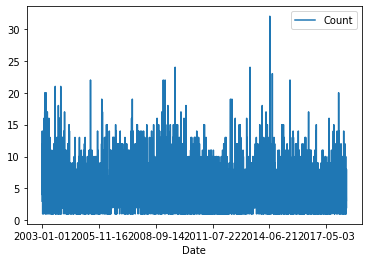

In [17]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('file3.csv', header=0, index_col=0)
series.plot()
pyplot.show()

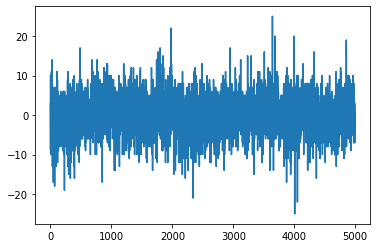

In [18]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('file3.csv', header=0, index_col=0)
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
	value = X[i] - X[i - days_in_year]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

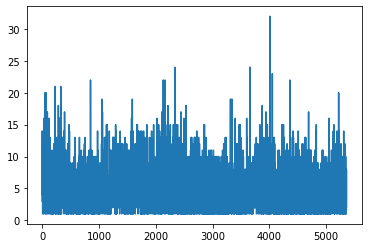

In [19]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('file3.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [20]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [21]:
numpy.random.seed(7)
dataframe = pandas.read_csv('file3.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))



3590 1769
3590 1769


In [22]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [24]:

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [25]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 11s - loss: 0.0117
Epoch 2/100
 - 8s - loss: 0.0114
Epoch 3/100
 - 8s - loss: 0.0114
Epoch 4/100
 - 8s - loss: 0.0114
Epoch 5/100
 - 8s - loss: 0.0114
Epoch 6/100
 - 8s - loss: 0.0114
Epoch 7/100
 - 8s - loss: 0.0114
Epoch 8/100
 - 8s - loss: 0.0114
Epoch 9/100
 - 8s - loss: 0.0114
Epoch 10/100
 - 8s - loss: 0.0114
Epoch 11/100
 - 8s - loss: 0.0114
Epoch 12/100
 - 8s - loss: 0.0114
Epoch 13/100
 - 8s - loss: 0.0114
Epoch 14/100
 - 8s - loss: 0.0114
Epoch 15/100
 - 8s - loss: 0.0114
Epoch 16/100
 - 8s - loss: 0.0114
Epoch 17/100
 - 8s - loss: 0.0114
Epoch 18/100
 - 8s - loss: 0.0114
Epoch 19/100
 - 8s - loss: 0.0114
Epoch 20/100
 - 8s - loss: 0.0114
Epoch 21/100
 - 8s - loss: 0.0114
Epoch 22/100
 - 8s - loss: 0.0114
Epoch 23/100
 - 8s - loss: 0.0114
Epoch 24/100
 - 8s - loss: 0.0114
Epoch 25/100
 - 8s - loss: 0.0114
Epoch 26/100
 - 8s - loss: 0.0114
Epoch 27/100
 - 8s - loss: 0.0114
Epoch 28/100
 - 8s - loss: 0.0114
Epoch 29/100
 - 8s - loss: 0.0114
Epoch 30/100
 - 8s - l

In [26]:

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 3.31 RMSE
Test Score: 3.19 RMSE


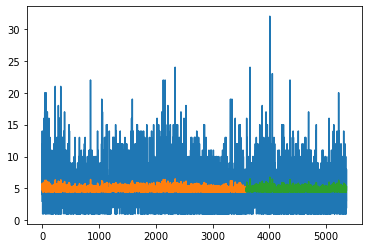

In [27]:

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
